In [2]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import sys



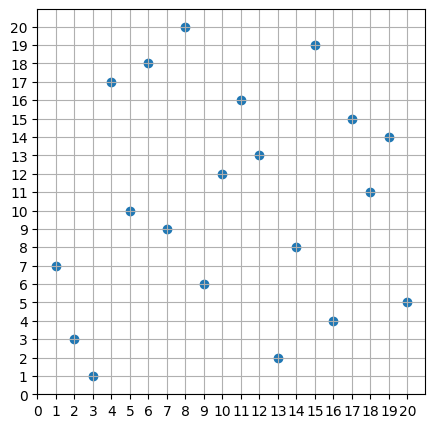

In [5]:
#helper image
pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

x = range(1,21)

# initialize figure
fig, fig = plt.subplots(figsize=(5, 5))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,21))
fig.set_yticks(range(0,21))
plt.grid(True)

<img src="tree.jpeg" alt="AVL Tree for pi" style="width: 700px;"/>

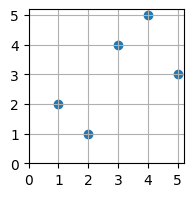

In [6]:
#small helper image
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

# initialize figure
fig, fig = plt.subplots(figsize=(2, 2))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

<img src="small_tree.jpeg" alt="AVL Tree for pi" style="width: 200px;"/>

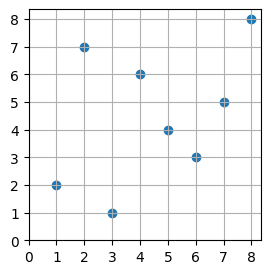

In [7]:
#small helper image
pi =  [2, 7, 1, 6, 4, 3, 5, 8]
x = range(1,9)

bad = [2, 4, 8]
badI = [1, 5, 8]
max = [2, 4, 5, 8]
maxI = [1, 5, 7, 8]

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x,pi)
#plt.plot(badI,bad)
#plt.plot(maxI,max)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,9))
fig.set_yticks(range(0,9))
plt.grid(True)

In [3]:
class Node(): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
  
class AVL_Tree(): 
    def insert(self, node, val): 
        if not node: 
            return Node(val) 
        elif val < node.val: 
            node.left = self.insert(node.left, val) 
        else: 
            node.right = self.insert(node.right, val) 
  
        node.height = 1 + max(self.height(node.left), 
                           self.height(node.right)) 
  
        balanced = self.balance(node) 

        # single right rotate
        if balanced > 1 and val < node.left.val: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and val > node.right.val: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and val > node.left.val: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and val < node.right.val: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 

        return node 
  
    def leftRotate(self, node): 
        right_child = node.right 
        t = right_child.left 
  
        right_child.left = node 
        node.right = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        right_child.height = 1 + max(self.height(right_child.left), self.height(right_child.right)) 
  
        return right_child 
  
    def rightRotate(self, node): 
        left_child = node.left 
        t = left_child.right 
  
        left_child.right = node 
        node.left = t 
  
        node.height = 1 + max(self.height(node.left), self.height(node.right)) 
        left_child.height = 1 + max(self.height(left_child.left), self.height(left_child.right)) 
        
        return left_child 
  
    def height(self, node): 
        if not node: 
            return 0
        return node.height 
  
    def balance(self, node): 
        if not node: 
            return 0
        return self.height(node.left) - self.height(node.right) 
    
    def preOrder(self, root):

        def preO(root): 
            if not root: 
                return
            print(root.val, end=" ") 
            preO(root.left) 
            preO(root.right) 

        preO(root)
        print()
        

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)] # 1, 2, 3, 4, 5

t = AVL_Tree()
root = None

for m in pi_increasing:
    root = t.insert(root, m)

t.preOrder(root)

root = None

for m in pi:
    root = t.insert(root, m)

t.preOrder(root)



2 1 4 3 5 
10 3 1 2 7 5 4 6 9 8 16 13 12 11 15 14 18 17 20 19 


#### Small Simulation

Simulating AVL tree creation on `pi_increasing`, 1 starts as the root. Then 2 is inserted as the right child of 1. Then 3 is inserted as the right child of 2. But now with 1 being the root, the left side has height 0 and the right side has height 2. Therefore, balanced = -2 and a left rotate is performed. Now the root is 2 with 1 as its left child and 3 as its right child. Then 4 is inserted as the right child of 3. Then 5 is inserted as the right child of 4 and a left rotate is performed on node 3.

### Augmented Binary Search Tree

note: needs split and concatenate for avl trees when splitting $Q^{*}$  $Q_{\alpha}$, also balance from the last implementation, also pointer to parent, also max?
and also SPLIT and CONCATENATE. also figure out when insertion happens. and make sure is actually balanced.

Read section 8 and 9 again

height should probably be changed to be part of a node and not a rerunning function every time

"It is natural to augment T and to associate with each node a a concatenable
queue Q, representing the lc-hull of the set of points stored at the leaves of its
subtree"

"{a is the internal node which was just reached in the search towards beta. Q*(a)
contains the complete lc-hull of the set of points covered by node a."

In [28]:
class Node(): 
    def __init__(self, val): 
        self.val = val
        self.f = None
        self.left = None
        self.right = None
        self.max = None
        self.q = []
        self.b = None
        self.height = 1

  
class Augmented_Tree():
    
    def insert(self, node, val, parent=None): 
        if not node: 
            new_node = Node(val)
            new_node.f = parent
            if parent:
                if parent.q is None:
                    parent.q = []
                while parent is not None:
                    parent.q.append(new_node.val)
                    parent = parent.f
            return new_node
        elif val < node.val: 
            node.left = self.insert(node.left, val, node) 
        else: 
            node.right = self.insert(node.right, val, node)
        
        node.height = 1 + max(self.height(node.left), 
                           self.height(node.right)) 
        
        node = self.balance(node)

        return node
    
    def remove(self, node, val):
        if not node:
            return None
        
        if val < node.val:
            node.left = self.remove(node.left, val)
            if node.left:
                node.left.f = node
        elif val > node.val:
            node.right = self.remove(node.right, val)
            if node.right:
                node.right.f = node
        else:
            if not node.left:
                child = node.right
                if child:
                    child.f = node.f
                node.f = None
                return child
            elif not node.right:
                child = node.left
                if child:
                    child.f = node.f
                node.f = None
                return child
            
            successor = node.right
            while successor.left:
                successor = successor.left

            node.val = successor.val
            node.right = self.remove(node.right, successor.val)
            if node.right:
                node.right.f = node

        node.height = 1 + max(self.height(node.left), 
                           self.height(node.right)) 
        
        node = self.balance(node)

        return node
    
    def height(self, node): 
        if not node: 
            return 0
        return node.height 
  
    def getbalance(self, node): 
        if not node: 
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def avlsplit(self, node, k):
        if not node: 
            return None, False, None
        l, m, r = node.left, node.val, node.right
        if k == m:
            new_l = Node(m)
            new_l.left = l
            if l:
                l.f = new_l
            r.f = None
            return self.balance(new_l), True, r
        if k < m:
            lprime, b, rprime = self.avlsplit(l, k)
            return lprime, b, self.avljoin(rprime, m, r)
        if k > m:
            lprime, b, rprime = self.avlsplit(r, k)
            return self.avljoin(l, m, lprime), b, rprime

    def avlrightjoin(self, left, k, right):
        l, kprime, c = left.left, left.val, left.right
        if self.height(c) <= self.height(right) + 1:
            tprime = Node(k)
            tprime.left = c
            if c:
                c.f = tprime
            tprime.right = right
            if right:
                right.f = tprime
            if self.height(tprime) <= self.height(l) + 1:
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = tprime
                if tprime:
                    tprime.f = return_node
                return return_node
            else: 
                return_node = Node(kprime)
                return_node.left = l
                if l:
                    l.f = return_node
                return_node.right = self.rightRotate(tprime)
                return self.leftRotate(return_node)
        else:
            tprime = self.avlrightjoin(c, k, right)
            tprimeprime = Node(kprime)
            tprimeprime.left = l
            if l:
                l.f = tprimeprime
            tprimeprime.right = tprime
            if tprime:
                tprime.f = tprimeprime
            if self.height(tprime) <= self.height(l) + 1:
                return tprimeprime
            else:
                return self.leftRotate(tprimeprime)
            
    def avlleftjoin(self, left, k, right):
        c, kprime, r = right.left, right.val, right.right
        if self.height(c) <= self.height(left) + 1:
            tprime = Node(k)
            tprime.left = left
            if left:
                left.f = tprime
            tprime.right = c
            if c:
                c.f = tprime
            if self.height(tprime) <= self.height(r) + 1:
                return_node = Node(kprime)
                return_node.left = tprime
                if tprime:
                    tprime.f = return_node
                return_node.right = r
                if r:
                    r.f = return_node
                return return_node
            else:
                return_node = Node(kprime)
                return_node.left = self.leftRotate(tprime)
                return_node.right = r
                if r:
                    r.f = return_node
                return self.rightRotate(return_node)
        else:
            tprime = self.avlleftjoin(left, k, c)
            tprimeprime = Node(kprime)
            tprimeprime.left = tprime
            if tprime:
                tprime.f = tprimeprime
            tprimeprime.right = r
            if r:
                r.f = tprimeprime
            if self.height(tprime) <= self.height(r) + 1:
                return tprimeprime
            else:
                return self.rightRotate(tprimeprime)

    # requires that k > all elements in left and k < all elements in right
    def avljoin(self, left, k, right):
        if self.height(left) > self.height(right) + 1:
            return self.avlrightjoin(left, k, right)
        if self.height(right) > self.height(left) + 1:
            return self.avlleftjoin(left, k, right)
        return_node = Node(k)
        return_node.left = left
        if left:
            left.f = return_node
        return_node.right = right
        if right:
            right.f = return_node
        return return_node
    
    def avlunion(self, node1, node2):
        if not node1:
            return node2
        if not node2:
            return node1
        tless, b, tgreater = self.avlsplit(node2, node1.val)
        return self.avljoin(self.avlunion(node1.left, tless), node1.val, self.avlunion(node1.right, tgreater))

    def split(self, root, value):
        """
        stack = []
        current = root
        nodes = []

        while current or stack:
            while current:
                stack.append(current)
                current = current.left

            current = stack.pop()
            nodes.append(current)
            current = current.right
        """

        node_to_split_on, b, L, R = self.down(root, value, set(), set()) #start at root and go down until searched value

        L_Trees = list()
        L_Trees_roots = list()
        R_Trees = list()
        R_Trees_roots = list()
        final_L_tree = Augmented_Tree()
        final_R_tree = Augmented_Tree()

        temp_L_lst = list(L)
        temp_R_lst = list(R)

        for i in range(len(L)):
            if i != 0:
                temp_L_lst[i].left = None

        for i in range(len(R)):
            if i != 0:
                temp_R_lst[i].right = None

        for n in L:
            new_tree = Augmented_Tree()
            new_tree.insert(None, n.val)
            L_Trees.append(new_tree)
            L_Trees_roots.append(n)

        for n in R:
            new_tree = Augmented_Tree()
            new_tree.insert(None, n.val)
            R_Trees.append(new_tree)
            R_Trees_roots.append(n)

        new_root1 = None
        new_root2 = None

        if len(L_Trees) == 0:
            final_L_tree = None
            new_root1 = None
        elif len(L_Trees) == 1:
            final_L_tree = L_Trees[0]
            new_root1 = L_Trees_roots[0]
        else:
            for num in range(len(L_Trees) - 1): # each iteration covers 2 trees, want to iterate until second to last tree
                    new_tree,new_root1 = L_Trees[num].concatenate(L_Trees[num+1], L_Trees_roots[num], L_Trees_roots[num+1])
                    L_Trees[num+1] = new_tree
                    L_Trees_roots[num+1] = new_root1
            final_L_tree = L_Trees[-1]

        if len(R_Trees) == 0:
            final_R_tree = None
            new_root2 = None
        elif len(R_Trees) == 1:
            final_R_tree = R_Trees[0]
            new_root2 = R_Trees_roots[0]
        else:
            for num in range(len(R_Trees) - 1): # each iteration covers 2 trees, want to iterate until second to last tree
                    new_tree,new_root2 = R_Trees[num].concatenate(R_Trees[num+1], R_Trees_roots[num], R_Trees_roots[num+1])
                    R_Trees[num+1] = new_tree
                    R_Trees_roots[num+1] = new_root2
            final_R_tree = R_Trees[-1]

        return final_L_tree,final_R_tree,new_root1,new_root2

        

    def concatenate(self, t2, root1, root2):
        #t1 is self
        h1 = self.height(root1)
        h2 = t2.height(root2)
        if h1 > h2:
            right,_,_,_ = self.down(root1, 0, set(), set(), 1) #0 value is negligible here            
            right.right = root2
            root2.f = right
            self.up(root2)
            while root1 is not None and root1.f is not None:
                root1 = root1.f
            end_root = root1

            #inorder traversal balancing due to tree unbalanced after up call
            stack = []
            current = root1
            nodes = []

            while current or stack:
                while current:
                    stack.append(current)
                    current = current.left

                current = stack.pop()
                nodes.append(current)
                current = current.right

            for node in nodes:
                self.balance(node)

            while root1.f is not None:
                root1 = root1.f
            end_root = root1

            self.qMaintenance(root1)
            return self, end_root
        elif h1 < h2:
            left,_,_,_ = t2.down(root2, 0, set(), set(), -1) #DOWN(t2 root, beta)
            left.left = root1
            root1.f = left
            t2.up(root1)
            while root2.f is not None:
                root2 = root2.f
            end_root = root2

            #inorder traversal balancing due to tree unbalanced after up call
            stack = []
            current = root2
            nodes = []

            while current or stack:
                while current:
                    stack.append(current)
                    current = current.left

                current = stack.pop()
                nodes.append(current)
                current = current.right

            for node in nodes:
                t2.balance(node)

            while root2.f is not None:
                root2 = root2.f
            end_root = root2
            
            root2 = t2.balance(root2)
            t2.qMaintenance(root2)
            return t2, end_root
        else: #Equal height trees
            new_tree = Augmented_Tree()
            new_root = Node(0)
            new_tree.insert(new_root, root1.val)
            new_root.left = root1
            new_root.right = root2
            left,v1,L1,R1 = new_tree.down(root1, 0, set(), set(), -1)
            right,v2,L1,R1 = new_tree.down(root2, 0, set(), set(), 1)
            left.left = root1
            root1.f = left
            right.right = root2
            root2.f = right
            new_tree.up(root1)
            new_tree.up(root2)
            while root1.f is not None:
                root1 = root1.f
            root1 = self.balance(root1)
            new_tree.qMaintenance(root1)
            new_tree.qMaintenance(root2) #might not need
            return new_tree, new_root


    def list_union(self, l1:list, l2:list):
        newlist = []
        if not l1 and not l2:
            return []
        if not l1:
            return l2
        if not l2:
            return l1
        l1c = 0
        l2c = 0
        while l1c < len(l1) and l2c < len(l2):
            if l1[l1c] <= l2[l2c]:
                newlist.append(l1[l1c])
                l1c = l1c + 1
            else:
                newlist.append(l2[l2c])
                l2c = l2c + 1 
        newlist.extend(l1[l1c:])
        newlist.extend(l2[l2c:])
        
        return newlist

    def down(self, a:Node, b, L, R, extreme=0, split=False):
        def inner(b, L, R):
            if a.left is not None and a.left.left is not None:
                q1 = a.left.left.q
            else:
                q1 = None
            if a.left is not None and a.left.right is not None:
                q2 = a.left.right.q
            else:
                q2 = None
            if a.left:
                a.left.q = self.list_union(a.left.q, q1)
            if a.right:
                a.right.q = self.list_union(q2, a.right.q)
            self.qMaintenance(a.left)
            self.qMaintenance(a.right)
            if a.left:
                L.add(a.left)
            if a.right:
                R.add(a.right)
            if b < a.val:
                return self.down(a.left, b, L, R, extreme)
            else:
                return self.down(a.right, b, L, R, extreme)
        
        if extreme == 1:
            if a.right is not None:
                return inner(sys.maxsize, L, R)
            else:
                return a,a.val,L,R
        elif extreme == -1:
            if a.left is not None:
                return inner(-sys.maxsize - 1, L, R)
            else:
                return a,a.val,L,R
        else:
            if a.val == b:
                return a,b,L,R
            else:
                return inner(b, L, R)

    def up(self, a):
        if a.left is not None:
            b_left_count = len(a.left.q)
            q1 = a.left.q[:b_left_count]
        else:
            b_left_count = 0
            q1 = None
        if a.right is not None:
            b_right_count = len(a.right.q)
            q2 = a.right.q[-b_right_count:]
        else:
            b_right_count = 0
            q2 = None
        a.q = self.list_union(q1, q2)
        a = self.balance(a)
        if a.f is not None: #if a is not the root
            return self.up(a.f)
        else:
            self.qMaintenance(a)
            return a.val

    #can probably be removed through using q instead
    def trace(self, a, set):
        def t(a): 
            if not a: 
                return 
            self.trace(a.left, True)
            set.add(a)
            self.trace(a.right, True)
        t(a)
        return set

    def balance(self, node):
        balanced = self.getbalance(node)

        # single right rotate
        if balanced > 1 and self.getbalance(node.left) >= 0: 
            return self.rightRotate(node) 

        # single left rotate
        if balanced < -1 and self.getbalance(node.right) <= 0: 
            return self.leftRotate(node) 
        
        # double right rotate
        if balanced > 1 and self.getbalance(node.left) < 0: 
            node.left = self.leftRotate(node.left) 
            return self.rightRotate(node) 

        # double left rotate
        if balanced < -1 and self.getbalance(node.right) > 0: 
            node.right = self.rightRotate(node.right) 
            return self.leftRotate(node) 
        
        return node

    def height(self, node):
        if not node:
            return 0
        return 1 + max(self.height(node.left), self.height(node.right))
    
    def qMaintenance(self, node):
        def qMain(node): #problem here
            if not node:
                return set()
            
            vals = set()
            if node.left:
                vals.add(node.left.val)
                vals.update(qMain(node.left))
            if node.right:
                vals.add(node.right.val)
                vals.update(qMain(node.right))
            node.q = list(vals)
            return vals
        return list(qMain(node))

    
    #after operations need to downward traverse all nodes and
    #update q list. Do this by taking set and checking downwards,
    #delete from set if node is a child, remove from q, at end remove from q
    #all leftover nodes in set. Should only have to compute for the
    #5 nodes used in either rotate. Lower nodes should be covered by other rotates.
    def leftRotate(self, node): 
        tmp = node.right
        if tmp:
            node.right = tmp.left
            if tmp.left:
                tmp.left.f = node
            tmp.left = node
            tmp.f = node.f
            node.f = tmp
            if tmp.f:
                if node.val < tmp.f.val:
                    tmp.f.left = tmp
                else:
                    tmp.f.right = tmp

            tmp.q = self.qMaintenance(tmp) #qMaint is the problem
            if tmp.left is not None:
                tmp.left.q = self.qMaintenance(tmp.left)
            if tmp.right is not None:
                tmp.right.q = self.qMaintenance(tmp.right)
                if tmp.right.left is not None:
                    tmp.right.left.q = self.qMaintenance(tmp.right.left)
                if tmp.right.right is not None:
                    tmp.right.right.q = self.qMaintenance(tmp.right.right)
            return tmp
        else:
            return node
  
    def rightRotate(self, node): 
        tmp = node.left
        if tmp:
            node.left = tmp.right
            if tmp.right:
                tmp.right.f = node
            tmp.right = node
            tmp.f = node.f
            node.f = tmp
            if tmp.f:
                if node.val < tmp.f.val:
                    tmp.f.left = tmp
                else:
                    tmp.f.right = tmp
        
            tmp.q = self.qMaintenance(tmp)
            if tmp.left is not None:
                tmp.left.q = self.qMaintenance(tmp.left)
                if tmp.left.left is not None:
                    tmp.left.left.q = self.qMaintenance(tmp.left.left)
                if tmp.left.right is not None:
                    tmp.left.right.q = self.qMaintenance(tmp.left.right)
            if tmp.right is not None:
                tmp.right.q = self.qMaintenance(tmp.right)
            return tmp
        else:
            return node

    def preOrder(self, root):
        def preO(node): 
            if not node: 
                return 
            print(f'Node: {node.val}, Parent: {node.f.val if node.f else None}')
            count = preO(node.left) 
            count = preO(node.right)
        preO(root)
        print()
    
    def print_tree(self, node, level=0, prefix="Root: "):
        if node is not None:
            print(" " * (level * 4) + prefix + str(node.val))
            print(" " * (level * 4) + str(node.q)) #check to see that q is correctly being constructed
            if node.left:
                self.print_tree(node.left, level + 1, "L--- ")
            if node.right:
                self.print_tree(node.right, level + 1, "R--- ")
  

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

# pi_short = [2, 1, 4, 5, 3]

#pi_increasing1 = [x for x in range(1, 6)] # 1, 2, 3, 4, 5
pi_increasing2 = [x for x in range(30, 33)] # 30, 31, 32

#Testing for down and up
"""
t = Augmented_Tree()
root1 = None
for val in pi:
    root1 = t.insert(root1, val)

root2 = None
for val in pi_increasing2:
    root2 = t.insert(root2, val)

root3 = t.avlunion(root1, root2)
t.preOrder(root3)

t.qMaintenance(root3)

t.print_tree(root3)

node7 = root3.left.right

t.up(node7)
t.print_tree(root3)

#val = t.down(root3,0,-1)
print(val)
t.print_tree(root3)
"""
#Testing for concatenate
"""
t1 = Augmented_Tree()
t2 = Augmented_Tree()

t1root = None
t2root = None

for val in range(1,5):
    t1root = t1.insert(t1root, val)

for val in range(6,15):
    t2root = t2.insert(t2root, val)

#t1.print_tree(t1root)
#t2.print_tree(t2root)

concatted_tree, new_root = t1.concatenate(t2, t1root, t2root)
#concatted_tree.print_tree(new_root)
"""
"""
#Testing split

L_tree,R_tree,L_root,R_root = concatted_tree.split(new_root, 10)

L_tree.print_tree(L_root)

R_tree.print_tree(R_root)
"""

#DRP test code

tree_1 = Augmented_Tree()

tree_2 = Augmented_Tree()

pi_1 = [2, 7, 1, 6, 4, 3, 5, 8]

pi_2 = [12, 9, 10, 11]

root_1 = None
root_2 = None

for val in pi_1:
    root_1 = tree_1.insert(root_1, val)

for val in pi_2:
    root_2 = tree_2.insert(root_2, val)

tree_1.print_tree(root_1)
tree_2.print_tree(root_2)

new_tree,new_root = tree_1.concatenate(tree_2,root_1,root_2)

new_tree.print_tree(new_root)

tree_1,tree_2,root_1,root_2 = new_tree.split(new_root, root_1.val)

tree_1.print_tree(root_1)
tree_2.print_tree(root_2)

Root: 4
[1, 2, 3, 6, 7, 5, 8]
    L--- 2
    [1, 3]
        L--- 1
        []
        R--- 3
        []
    R--- 6
    [7, 5, 8]
        L--- 5
        []
        R--- 7
        [8]
            R--- 8
            []
Root: 10
[9, 12, 11]
    L--- 9
    []
    R--- 12
    [11]
        L--- 11
        []
Root: 7
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
    L--- 4
    [1, 2, 3, 5, 6]
        L--- 2
        [1, 3]
            L--- 1
            []
            R--- 3
            []
        R--- 6
        [5]
            L--- 5
            []
    R--- 10
    [8, 9, 11, 12]
        L--- 8
        [9]
            R--- 9
            []
        R--- 12
        [11]
            L--- 11
            []
Root: 4
[1, 2, 3, 5, 6]
    L--- 2
    [1, 3]
        L--- 1
        []
        R--- 3
        []
    R--- 6
    [5]
        L--- 5
        []
Root: 10
[8, 9, 11, 12]
    L--- 8
    [9]
        R--- 9
        []
    R--- 12
    [11]
        L--- 11
        []
